# Principal Component Analysis (PCA)

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Model
from sklearn.decomposition import PCA

# Data visualization
import matplotlib.pyplot as plt

# User interface
import gradio as gr

## Functions

## PCA calculation example 

Create a small dataset and calculate the Eigenvalues, Eigenvectors, and PCA components.

* Generate the a dataset of 4 samples with 2 features (a, b)
* Number of features, D = 2
* Number of samples, N = 4

|  a |   b |
|----|-----|
|  4 |  11 |
|  8 |   4 |
| 13 |   5 |
|  7 |  14 |

In [3]:
X = np.array([[4, 11],
              [8, 4],
              [13, 5],
              [7, 14]])

### Eigenvalues and Eigenvectors

* Normally we use Principle Component Analysis to reduce the dimensionality of a dataset
* We achieve this by creating new uncorrelated variables (PCAs) that successively maximize variance
* We want these new features to be fewer in number than the original features they are derived from
* In this example, the original dataset has only 2 features and we are NOT reducing their number
* Instead, we use Scikit Learn to compute the new PCAs

In [4]:
# Create PCA model
pca = PCA()

# Fit model
pca.fit(X)
X_pca = pca.transform(X)

### Results

In [5]:
print("Eigenvalues:", pca.explained_variance_)
print("Eigenvectors:", pca.components_)
print("")
print("Original dataset:\n", X)
print("")
print("Reduced dataset:\n", X_pca)

Eigenvalues: [30.38486432  6.61513568]
Eigenvectors: [[ 0.55738997 -0.83025082]
 [-0.83025082 -0.55738997]]

Original dataset:
 [[ 4 11]
 [ 8  4]
 [13  5]
 [ 7 14]]

Reduced dataset:
 [[-4.30518692  1.92752836]
 [ 3.73612869  2.50825486]
 [ 5.69282771 -2.20038921]
 [-5.12376947 -2.23539401]]


## Interactive PCA

* Create a Gradio front-end that creates a random, small dataset with a few features
* Allow user-specified number of components to keep
* Perform calculations and display Eigenvalues, Eigenvectors and the transformed dataset

In [ ]:
# To-do


## Abalone measurement dimension reduction

* Predict the age of abalone from physical measurements
* Apply PCA to the dataset and show a scree plot
* Choose the "best" number of principle components
* Re-apply PCA using that number

### Load dataset

In [6]:
abalone = pd.read_csv("abalone.csv")
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Clean dataset

* Remove target variable "Rings"
* Remove categorical feature "Sex"

In [7]:
X = abalone.drop(columns=["Sex", "Rings"])
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [8]:
# Create PCA model
pca = PCA()

# Fit model
pca.fit(X)
X_pca = pca.transform(X)

# Results
print("Eigenvalues:", pca.explained_variance_)
print("")
print("Eigenvectors:", pca.components_)
print("")
print("Number of PCA components:", pca.n_components_)

Eigenvalues: [3.38170727e-01 3.96403025e-03 2.90771416e-03 1.05490434e-03
 4.89663867e-04 4.26787482e-04 1.48141736e-04]

Eigenvectors: [[ 1.93156059e-01  1.59552075e-01  5.92827068e-02  8.42619224e-01
   3.71958945e-01  1.82251024e-01  2.28349259e-01]
 [-3.50069286e-01 -3.18820741e-01 -1.34751753e-01 -1.88240197e-02
   7.03431694e-01 -1.29477099e-02 -5.12160776e-01]
 [-6.55435958e-01 -5.05473077e-01 -8.60795787e-02  3.11470276e-01
  -3.37272496e-01  2.50613453e-02  3.09994257e-01]
 [-3.87845990e-02  1.80604524e-02  4.68325197e-03 -1.27977156e-01
   3.53767145e-01 -7.62977566e-01  5.23911759e-01]
 [-1.55845008e-01 -7.48357409e-02  9.24448472e-01 -1.67979449e-01
   1.62443835e-01  2.07282449e-01  1.33924825e-01]
 [-5.60615302e-04  3.02034552e-02  3.37704883e-01  3.84695312e-01
  -3.18402885e-01 -5.82880918e-01 -5.43986951e-01]
 [-6.20285186e-01  7.81379947e-01 -4.73954978e-02 -6.24787436e-03
   1.25725048e-02  3.37328611e-02 -3.33215094e-02]]

Number of PCA components: 7


### Scree plot

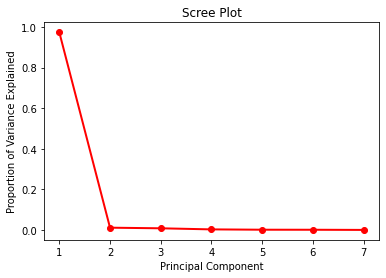

In [9]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

### Retain first 2 principle components

In [16]:
# Create PCA model and keep 2 components (as indicated in scree plot)
pca = PCA(n_components=2)

# Fit model
pca.fit(X)
X = pca.transform(X)

In [17]:
pca.explained_variance_

array([0.33817073, 0.00396403])

In [18]:
pca.components_

array([[ 0.19315606,  0.15955208,  0.05928271,  0.84261922,  0.37195895,
         0.18225102,  0.22834926],
       [-0.35006929, -0.31882074, -0.13475175, -0.01882402,  0.70343169,
        -0.01294771, -0.51216078]])

### Plot principle components

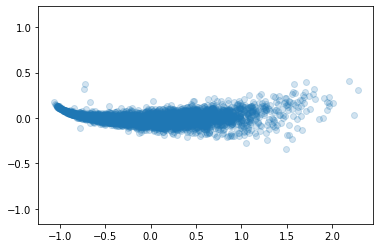

In [21]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.axis('equal')
plt.show()